<img src=Untitleddesign.jpg />

 # <div align="center"><strong>LAB Data Preparation</strong></div>


## Objectives


* Explore and Visualize:
   - Understand and identify anomalies in the "CouponRecommendation.csv" dataset through thorough exploration and visualization.

* Clean and Transform Data
  - Apply data cleaning and transformation techniques to address missing values, outliers, and to enhance the properties of both categorical and numerical features

* Implement Feature Engineering:
  - Introduce feature engineering techniques if necessary, aiming to improve the dataset for analysis and modeling.

* Document and Deliver:
  - Create a detailed notebook outlining business understanding, data exploration, and the applied data preparation techniques. Deliver a CSV file with the cleaned and prepared data, and prepare a concise 10-minute presentation on the process and outcomes.






For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for visualizing the data.
*   [`plotly.express`](https://plotly.com/python/plotly-express/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for visualizing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for machine learning and machine-learning-pipeline related functions.


## Table of Contents


<div class="alert alert-block alert-info" style="margin-top: 10px">
    <ol>
        <li><a href="#introduction">Introduction</a></li>
        <li><a href="#import_libraries">Install Packages and Import Libraries</a></li>
        <li><a href="#dataset_analysis">Dataset Exploration</a></li>
        <li><a href="#dataset_preprocessing">Dataset Preparation </a></li>
        <li><a href="#dataset_split">Dataset Transformation</a></li>
        <li><a href="#dt_sklearn">PCA</a></li>
    </ol>
</div>
<br>
<hr>


<div id="Introduction">
    <h2>Introduction</h2>
    <br>Introduction to Data Preparation Lab: In-Vehicle Coupon Recommendation
Welcome to the Data Preparation Lab for the In-Vehicle Coupon Recommendation dataset. This dataset, gathered through a survey on Amazon Mechanical Turk, presents various driving scenarios and aims to predict whether an individual, acting as the driver, would accept a coupon under specific circumstances.
    <br>
</div>


<div id="import_libraries">
    <h2>Install Packages</h2>
</div>


In [ ]:
pip install dataprep

In [ ]:
pip install -U pandas-profiling

In [ ]:
!pip install -U pydantic

In [ ]:
!pip install pydantic-settings

In [ ]:
pip install ydata-profiling

<div id="import_libraries">
    <h2>Import Libraries</h2>
</div>


In [7]:
# Import the libraries we need to use in this lab
from __future__ import print_function
import numpy as np
import pandas as pd
import seaborn as sns
from pydantic_settings import BaseSettings
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder


<div id="import_libraries">
    <h2>Data Exploration</h2>
</div>

<font color='blue' ><h3>
Import Data,Data summary and informations </p><h3>

In [8]:
data = pd.read_csv("/CouponRecommendation.csv")

In [10]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


We have both numerical and categorical variables in the dataset.
There are also missing data (NaN)."


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

We have 8 numerical variables (temperature, has_children, toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp, Y) and 18 categorical variables.
There are missing values in several columns

In [12]:
unique_value_counts = data.nunique()
unique_value_counts

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

According to the description above, we can see that 'toCoupon_GEQ5min' has only one unique value, which won''t
contribute much to the encoding of categorical variables. Therefore, it's better to drop this column.

In [15]:
profile = ProfileReport(data)
profile.to_widgets()

NameError: ignored

In [ ]:
profile.to_json()
profile.to_file("ML.html")

generate a comprehensive profiling report for your dataset, save it in both JSON and HTML formats, and allow you to review and share the analysis with others.

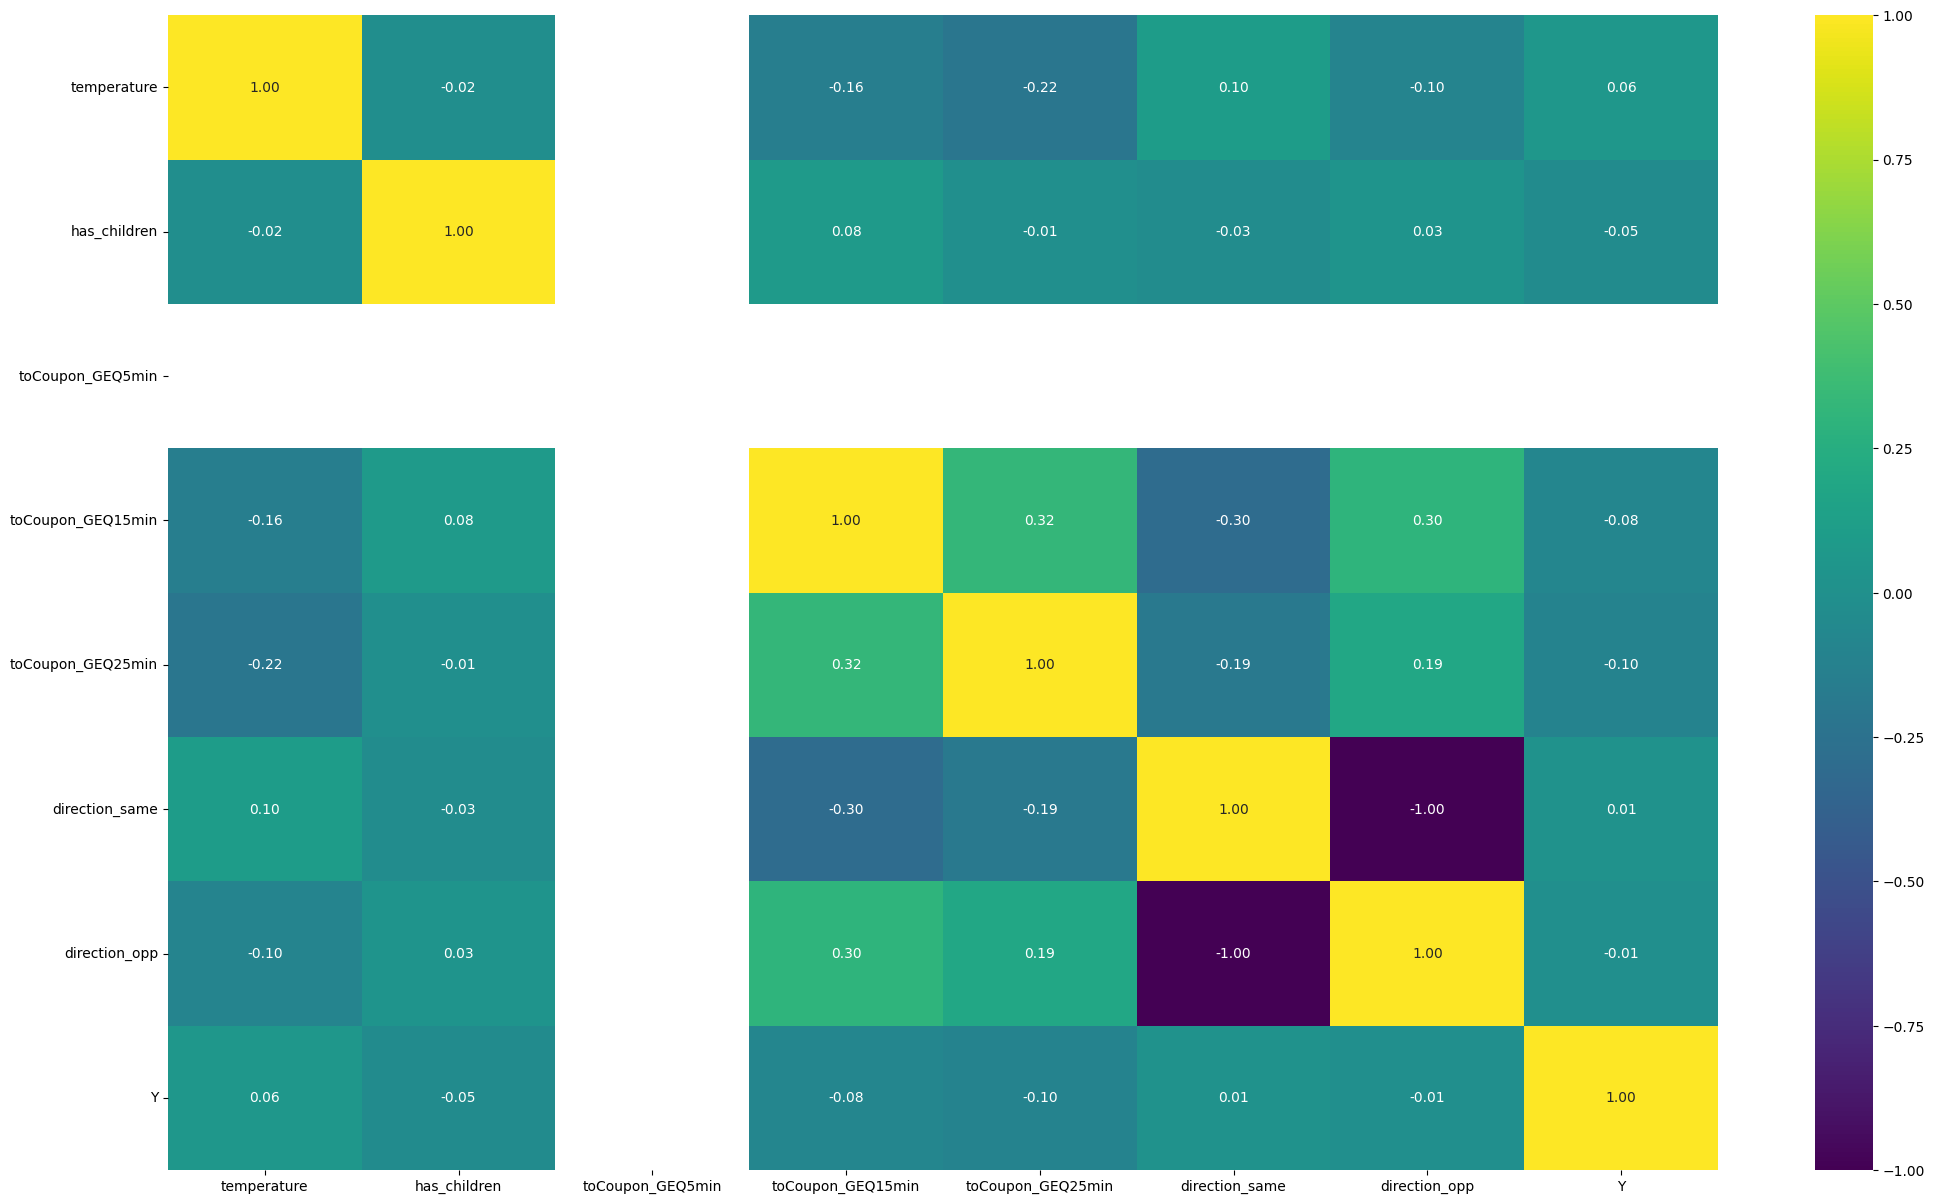

In [17]:

# Select only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.show()


Due to a strong negative correlation between 'direction_same' and 'direction_opp,' it is advisable to eliminate one of them.

<div id="import_libraries">
    <h2>Data Preparation</h2>
</div>
<font color='blue' ><h3>
Cleaning data , Feature Engineering and Data Splitting </p><h3>

In [18]:
duplicates_mask =data.duplicated(subset=None,keep='first')

nombre_de_doublons = duplicates_mask.sum()
print (nombre_de_doublons )
data.drop_duplicates(subset=None,keep='first',inplace=True,ignore_index=False)

74


In [19]:
missing_values = data.isnull().sum()
print(missing_values)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                       107
CoffeeHouse               217
CarryAway                 150
RestaurantLessThan20      129
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


We can see that car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50 have some missing values.
But let see the pourcentage of missing values in each of these columns compares to dataset to decide what to do foreach one.

In [20]:
# Calculate the total number of rows
total_rows = len(data)

# Calculate the number of missing values per column
missing_values_per_column = data.isnull().sum()

# Calculate the percentage of missing data for each column
percentage_missing_per_column = (missing_values_per_column / total_rows) * 100

# Filter out columns that have no missing data and sort descending
percentage_missing_per_column = percentage_missing_per_column[percentage_missing_per_column > 0].sort_values(ascending=False)

# Display the percentage of missing data for columns with missing data
print(percentage_missing_per_column)

car                     99.143537
CoffeeHouse              1.720856
Restaurant20To50         1.498810
CarryAway                1.189532
RestaurantLessThan20     1.022998
Bar                      0.848533
dtype: float64


In [21]:
#drop the column car because most of its values are null
df = data.drop('car', axis=1)

Given that the "car" column exhibits a staggering 99.14% missing data, it is evident that this column contributes negligible information. Consequently, it is advisable to remove this column from the dataset.

In [22]:
# The distribution of the 'Bar' column.
restaurant20to50_distribution = data['Bar'].value_counts(normalize=True) * 100
print(restaurant20to50_distribution)

never    41.414061
less1    27.497401
1~3      19.739263
4~8       8.565944
gt8       2.783332
Name: Bar, dtype: float64


In [23]:
# The distribution of the 'CoffeeHouse' column.
coffeehouse_distribution = data['CoffeeHouse'].value_counts(normalize=True) * 100
print(coffeehouse_distribution)


less1    27.128218
1~3      25.812959
never    23.771484
4~8      14.354878
gt8       8.932462
Name: CoffeeHouse, dtype: float64


Considering the distribution of the "Coffeehouse" column, no single category emerges as the dominant choice for imputation. The top three most frequent categories ("less1," "1~3," "never") exhibit comparable frequencies, indicating that selecting any one of them might introduce bias. Alternatively, we could opt for random value imputation. Another viable option is to drop rows with null values in the "Coffeehouse" column, given their limited representation at 1.71%. This action is unlikely to significantly impact the dataset's integrity or result in the loss of valuable information.

In [24]:
# Dropping rows with null values
data = data.dropna(subset=['CoffeeHouse'])

In [25]:
# The distribution of the 'Restaurant20To50' column.
restaurant20to50_distribution = data['Restaurant20To50'].value_counts(normalize=True) * 100
print(restaurant20to50_distribution)


less1    48.528573
1~3      26.444934
never    16.939757
4~8       5.934621
gt8       2.152115
Name: Restaurant20To50, dtype: float64


For the 'Restaurant20To50' column, which has only 1.49% missing values, instead of dropping these rows, we can impute them with the most frequent value. "less1" appears in almost half of the column's data and is less likely to introduce bias, especially given the small number of missing rows in this column.

In [26]:
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12605,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12606,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12607,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12608,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [27]:
df_imputed.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

<div id="import_libraries">
    <h2>Data Transformation</h2>
</div>

### **Dealing with Categorical Variables**


### 1.Ordinal Feature
The columns education ,bar,coffeehouse,carryaway,restaurant are ordinal features                    
1) Apply ordinal encoding on education first                             
2) Apply ordinal encoding on the rest of the columns

In [28]:
new_df=df_imputed
ordinal_encoder = {
    'Restaurant20To50': {
        'never': 0,        # Never visit
        '1~3': 2,          # Visit 1 to 3 times a month => an average of 2 times per month.
        '4~6': 5,          # Visit 4 to 6 times a month =>  an average of 5 times per month
        'gt7': 7          # Visit more than 7 times a month => we can take the minimum
    },
    'RestaurantLessThan20': {
        'never': 0,        # Never visit
        '1~3': 2,          # Visit 1 to 3 times a month => an average of 2 times per month.
        '4~6': 5,          # Visit 4 to 8 times a month =>  an average of 5 times per month
        'gt7': 7          # Visit more than 8 times a month
    },
    'CarryAway': {
        'never': 0,
        '1~3': 2,
        '4~6': 5,
        'gt7': 7
    },
    'Bar': {
      'never': 0,
        '1~3': 2,
        '4~6': 5,
        'gt7': 7
    },
    'CoffeeHouse': {
       'never': 0,
        '1~3': 2,
        '4~6': 5,
        'gt7': 7
    },
    'gender': {
        'Male': 1, 'Female': 0
    },
    'expiration': {
        '1d': 24, '2h': 2
    },
    #24 => 24h :1Day / 2= 2h
    'time': {
        '7AM': 7, '10AM': 10, '2PM': 14, '6PM': 18, '10PM': 22
    }, #we took AM and PM into consideration
    'education': {
        'Some High School': 1, 'High School Graduate': 1, 'Some college - no degree': 2,
        'Associates degree': 2, 'Bachelors degree': 3,'Graduate degree (Masters or Doctorate)':3
    },
    #'High School or Less': ['Some High School', 'High School Graduate'] => 1
    # 'Some College or Associates': ['Some college - no degree', 'Associates degree'] => 2
    #'Bachelors or Higher': ['Bachelors degree', 'Graduate degree (Masters or Doctorate)'] => 3
    'income': {
        'Less than $12500': 12499,                       # Minimum value for 'Less than $12500'
        '$12500 - $24999': (12500 + 24999) / 2,      # Mean value for '$12500 - $24999'
        '$25000 - $37499': (25000 + 37499) / 2,      # Mean value for '$25000 - $37499'
        '$37500 - $49999': (37500 + 49999) / 2,      # Mean value for '$37500 - $49999'
        '$50000 - $62499': (50000 + 62499) / 2,      # Mean value for '$50000 - $62499'
        '$62500 - $74999': (62500 + 74999) / 2,      # Mean value for '$62500 - $74999'
        '$75000 - $87499': (75000 + 87499) / 2,      # Mean value for '$75000 - $87499'
        '$87500 - $99999': (87500 + 99999) / 2,      # Mean value for '$87500 - $99999'
        '$100000 or More': 100001                    # Maximum value for '$100000 or More'
    },
    'age': {
        'below21': 20, '21': 21, '26': 26, '31': 31, '36': 36, '41': 41, '46': 46, '50plus': 51
    },
    'destination': {
        'No Urgent Place': 1,
        'Home': 2,
        'Work': 3
    },
    'passanger': {
        'Alone': 1,
        'Friend(s)': 2,
        'Kid(s)': 3,
        'Partner': 2
    }, #=> here its either alone or accompanied with adults or accompanied with kids
    'weather': {
        'Sunny': 1, #hot/good weither
        'Rainy': 2, #cold weather
        'Snowy': 2 # cold weather
    }, #its either hot weither or cold weither
    'coupon': {
        'Restaurant(<20)': 1,
        'Coffee House': 2,
        'Carry out & Take away': 3,
        'Bar': 4,
        'Restaurant(20-50)': 5
    },
    'maritalStatus': {
        'Unmarried partner': 1, #have a partner
        'Single': 1, #have never married
        'Married partner': 2, #have a partner
        'Divorced': 1, #more likely to have kids/ go to places where he can meet a future partner
        'Widowed': 1 #more likely to have kids/ go to places where he can meet a future partner
    },
    'occupation': {
        'Student': 0,
        'Unemployed': 1,
        'Retired': 2,
        # Assign a unique numeric code for 'Employed'
        'Architecture & Engineering': 3,
        'Education&Training&Library': 3,
        'Healthcare Support': 3,
        'Healthcare Practitioners & Technical': 3,
        'Sales & Related': 3,
        'Management': 3,
        'Arts Design Entertainment Sports & Media': 3,
        'Computer & Mathematical': 3,
        'Life Physical Social Science': 3,
        'Personal Care & Service': 3,
        'Community & Social Services': 3,
        'Office & Administrative Support': 3,
        'Construction & Extraction': 3,
        'Legal': 3,
        'Installation Maintenance & Repair': 3,
        'Transportation & Material Moving': 3,
        'Business & Financial': 3,
        'Protective Service': 3,
        'Food Preparation & Serving Related': 3,
        'Production Occupations': 3,
        'Building & Grounds Cleaning & Maintenance': 3,
        'Farming Fishing & Forestry': 3
    }
    #For the "occupation feature as it contains more than 20 different unique value,
    #we choose to aasign 'Student' to 0, 'Unemployed' to 1,
    #'Retired' to 2, and 'Employed' to 3"
}

# Applying the ordinal encoding to the dataset
for col, encoding in ordinal_encoder.items():
    new_df[col] = new_df[col].replace(encoding)

# Display the updated dataset
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12610 entries, 0 to 12609
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12610 non-null  int64  
 1   passanger             12610 non-null  int64  
 2   weather               12610 non-null  int64  
 3   temperature           12610 non-null  object 
 4   time                  12610 non-null  int64  
 5   coupon                12610 non-null  int64  
 6   expiration            12610 non-null  int64  
 7   gender                12610 non-null  int64  
 8   age                   12610 non-null  int64  
 9   maritalStatus         12610 non-null  int64  
 10  has_children          12610 non-null  object 
 11  education             12610 non-null  int64  
 12  occupation            12610 non-null  int64  
 13  income                12610 non-null  float64
 14  Bar                   12610 non-null  object 
 15  CoffeeHouse        

### 2.Nominal Features



In [30]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(dtype=int, sparse=True)

In [31]:
data1 = pd.get_dummies(data=new_df, columns =['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp'])

<ipython-input-31-fe5b696394a9>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data1 = pd.get_dummies(data=new_df, columns =['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
<ipython-input-31-fe5b696394a9>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data1 = pd.get_dummies(data=new_df, columns =['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
<ipython-input-31-fe5b696394a9>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data1 = pd.get_dummies(data=new_df, columns =['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
<ipython-input-31-fe5b696394a9>:1: FutureWarning: In a future version, the Index cons

In [32]:
data1.head()

,education,Y,destination_1,destination_2,destination_3,passanger_1,passanger_2,passanger_3,weather_1,weather_2,...,Restaurant20To50_less1,toCoupon_GEQ5min_1,toCoupon_GEQ15min_0,toCoupon_GEQ15min_1,toCoupon_GEQ25min_0,toCoupon_GEQ25min_1,direction_same_0,direction_same_1,direction_opp_0,direction_opp_1
0,2,1,1,0,0,1,0,0,1,0,...,0,1,1,0,1,0,1,0,0,1
1,2,0,1,0,0,0,1,0,1,0,...,0,1,1,0,1,0,1,0,0,1
2,2,1,1,0,0,0,1,0,1,0,...,0,1,0,1,1,0,1,0,0,1
3,2,0,1,0,0,0,1,0,1,0,...,0,1,0,1,1,0,1,0,0,1
4,2,0,1,0,0,0,1,0,1,0,...,0,1,0,1,1,0,1,0,0,1


In [33]:
data1.shape

(12610, 86)

In [34]:
data.shape


(12393, 26)

As we can see, we went from 26 original features in our dataset to 86. This is because *Pandas* `get_dummies()` approach when applied to a column with different categories  will produce a new column (variable) for each unique categorical value . It will place a one in the column corresponding to the categorical value present for that observation.


In [35]:
data1.describe()

,education,destination_1,destination_2,destination_3,passanger_1,passanger_2,passanger_3,weather_1,weather_2,temperature_30,...,Restaurant20To50_less1,toCoupon_GEQ5min_1,toCoupon_GEQ15min_0,toCoupon_GEQ15min_1,toCoupon_GEQ25min_0,toCoupon_GEQ25min_1,direction_same_0,direction_same_1,direction_opp_0,direction_opp_1
count,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,...,12610.000000,12610.0,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,2.409437,0.496907,0.256146,0.246947,0.574782,0.345837,0.079381,0.793894,0.206106,0.182791,...,0.494052,1.0,0.440206,0.559794,0.883981,0.116019,0.784457,0.215543,0.215543,0.784457
std,0.631167,0.500010,0.436521,0.431253,0.494396,0.475659,0.270344,0.404524,0.404524,0.386511,...,0.499984,0.0,0.496432,0.496432,0.320260,0.320260,0.411215,0.411215,0.411215,0.411215
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.0,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
# Calculate IQR for temperature
Q1 = data['temperature'].quantile(0.25)
Q3 = data['temperature'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Display potential outliers
outliers = data[(data['temperature'] < lower_bound) | (data['temperature'] > upper_bound)]
print(outliers['temperature'])


Series([], Name: temperature, dtype: int64)


No outliers for temperature.

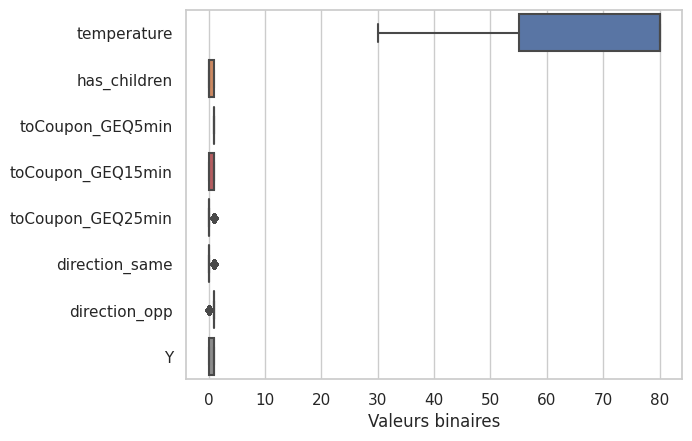

In [42]:
sns.set(style='whitegrid')
sns.boxplot(data=data, orient="h")
plt.xlabel("Valeurs binaires")
plt.show()


<div id="PCA">
    <h2>PCA</h2>
</div>

In [38]:
from sklearn.decomposition import PCA

In [51]:
X = data1.drop(columns=['Y'])

In [52]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12610 entries, 0 to 12609
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   education                   12610 non-null  int64
 1   destination_1               12610 non-null  uint8
 2   destination_2               12610 non-null  uint8
 3   destination_3               12610 non-null  uint8
 4   passanger_1                 12610 non-null  uint8
 5   passanger_2                 12610 non-null  uint8
 6   passanger_3                 12610 non-null  uint8
 7   weather_1                   12610 non-null  uint8
 8   weather_2                   12610 non-null  uint8
 9   temperature_30              12610 non-null  uint8
 10  temperature_55              12610 non-null  uint8
 11  temperature_80              12610 non-null  uint8
 12  time_7                      12610 non-null  uint8
 13  time_10                     12610 non-null  uint8
 14  time_1

In [53]:
# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Text(0.5, 1.0, 'Explained Variance by Principal Components')

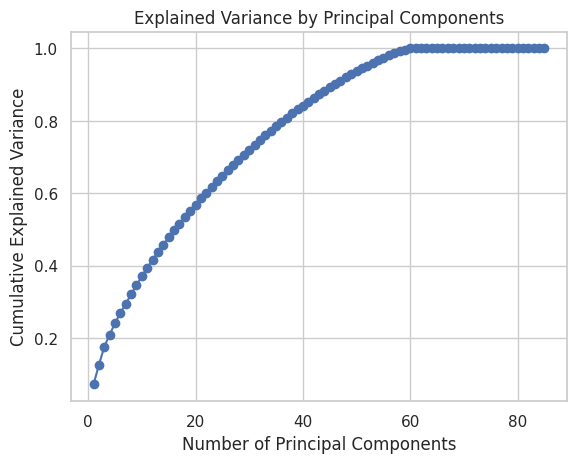

In [54]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot the explained variance
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')

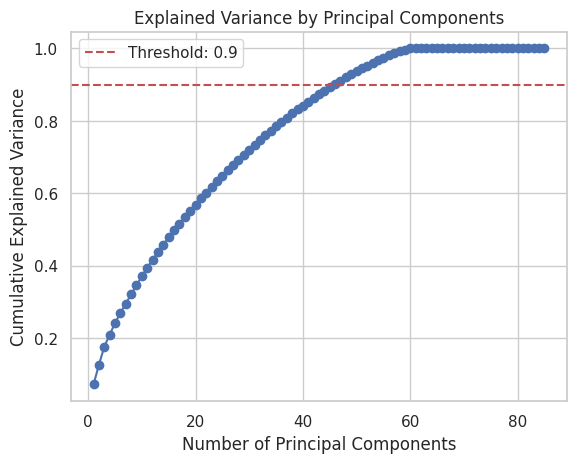

Chosen number of components based on 90.0% threshold: 46
0.9016927587837089


In [78]:
threshold = 0.90

# Find the number of components that achieve or exceed the threshold
n_components = next(idx for idx, value in enumerate(cumulative_explained_variance, start=1) if value >= threshold)

# Plot the explained variance
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.show()

# Display the chosen number of components
print(f"Chosen number of components based on {threshold * 100}% threshold: {n_components}")
print(sum(pca.explained_variance_ratio_[:46]))

In [57]:
# Choosing the number of components based on the threshold
n_components = 46

# Creating a new PCA instance with the chosen number of components
pca = PCA(n_components=n_components)

# Fit and transform the data
X_pca = pca.fit_transform(X_scaled)

# Display the transformed data
print(X_pca)

[[-1.00239822e+00 -4.50606817e-01 -6.03282743e-01 ... -1.07385811e+00
   1.25706962e+00 -5.15764598e-01]
 [-2.18266270e+00 -2.47083722e+00 -6.20479213e-01 ... -8.66230866e-01
   1.14418490e+00 -6.83126864e-01]
 [-2.45921926e+00 -1.25420960e+00 -5.23647664e-01 ... -1.02358651e+00
   1.23140127e+00 -6.24771550e-01]
 ...
 [ 4.64134402e+00  8.39259326e-01 -8.15385966e-01 ...  6.29403181e-01
  -3.98149162e-01 -7.86315537e-01]
 [ 1.08747051e+00  5.95851401e+00 -1.79312757e+00 ...  1.26363119e+00
  -7.15491099e-02 -6.05938184e-01]
 [ 4.44121390e+00 -1.60301538e+00 -3.85488794e-01 ...  1.29144668e+00
  -1.37245551e-03 -4.37693855e-01]]


<ipython-input-60-e7f67326e119>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


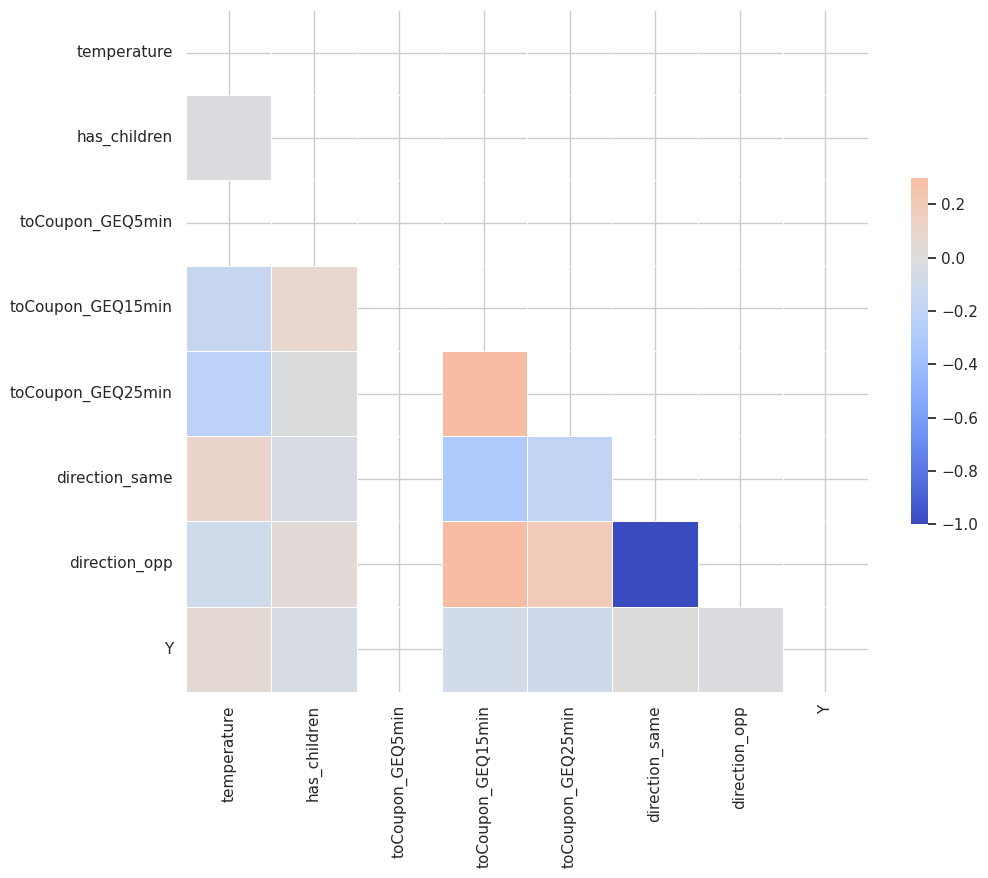

In [60]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


In [64]:
X = new_df.drop('Y', axis=1)  # Features
y = new_df['Y']
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [65]:
# Check the shape of X_pca and y
print(X_pca.shape, y.shape)

# Ensure that the number of samples is consistent
min_samples = min(X_pca.shape[0], y.shape[0])

# Slice X_pca and y to have the same number of samples
X_pca = X_pca[:min_samples, :]
y = y[:min_samples]

# Now, check the shape again
print(X_pca.shape, y.shape)

# Proceed with train-test split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


(12610, 46) (12610,)
(12610, 46) (12610,)


The output indicates the shape of your original data before and after ensuring consistency between the number of samples in X_pca and y.

Original shapes:

X_pca had a shape of (12610, 46), indicating 12610 samples and 46 features.
y had a shape of (12610,), indicating 12610 samples.
Adjusted shapes:

To resolve the inconsistency, the code snippet sliced both X_pca and y to have the same number of samples, which is the minimum number of samples between the two.
.


In [71]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Encode the target variable
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_pca, y_train_encoded)

# Make predictions on the testing data
y_pred = knn.predict(X_test_pca)


In [73]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Encode the target variable
y_test_encoded = label_encoder.fit_transform(y_test)

# Now use y_test_encoded for computing the classification report
print(classification_report(y_test_encoded, y_pred))


              precision    recall  f1-score   support

           0       0.65      0.56      0.61      1106
           1       0.69      0.77      0.73      1416

    accuracy                           0.68      2522
   macro avg       0.67      0.66      0.67      2522
weighted avg       0.67      0.68      0.67      2522



The KNN classifier achieved an accuracy of approximately 68% on the testing data, indicating that it made correct predictions for about 79.35% of the instances.

In [75]:
# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {'n_neighbors': range(1, 30)}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Fit the grid search to the data (perform hyperparameter tuning)
grid_search.fit(X_train_pca, y_train_encoded)

# Print the best parameters and the corresponding cross-validated score
print("Best Parameters:")
print(grid_search.best_params_)
print(f"Best Cross-Validated Score: {grid_search.best_score_}")


Best Parameters:
{'n_neighbors': 28}
Best Cross-Validated Score: 0.6997414445007328


The output reveals that, after hyperparameter tuning with GridSearchCV:

Best Parameters: Optimal n_neighbors value is 28 for the KNN classifier.

Best Cross-Validated Score: Achieved accuracy is around 70% on the training data with 5-fold cross-validation.


---

### **Acknowledgments:**

- The contributors of this lab:
  - [Zeineb ben Arab](link_to_contributor_1_github)
  - [Neil Monastiri](link_to_contributor_2_github)
  - [Montassar Maiza](link_to_contributor_2_github)
  - [Iness Elahchaichi](link_to_contributor_2_github)

### **Class Information:**

- **Class:** International class 4DS1
- **Instructor:** Rahma Ferjani


*Thank you for exploring this lab with us! Feel free to reach out if you have any questions or suggestions.*
